# Assignment8

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [24]:
df = pd.read_csv("car_data.csv")

In [25]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# #Tasks, Part 1

In [26]:
#Dependent and independent variable setting
x = df[['Mileage']]
y = df[['Price']]

In [27]:
#Applying Linear regression
LinReg = LinearRegression()
LinReg.fit(x,y)

LinearRegression()

In [28]:
#Find the linear regression equation for mileage vs price.
print('Intercept:', LinReg.intercept_)
print('Coefficient:', LinReg.coef_)

Intercept: [24764.55900606]
Coefficient: [[-0.1725205]]


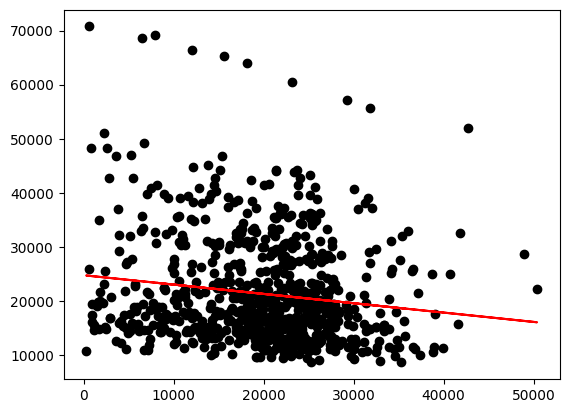

In [29]:
#Chart the original data and the equation on the chart.
plt.scatter(x, y,color='black')
plt.plot(x, LinReg.predict(x), color='red')

In [8]:
#the equation's  𝑅2  score using the '.score' method.
print('R-squared: ', LinReg.score(x, y))

R-squared:  0.02046344732348926


### R-squared value:  0.02046344732348926 is less than 0.8 that is the equation is not a good fit for this data. 

# # Tasks, Part 2

In [30]:
#Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
x = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
y = df[['Price']]

In [31]:
#Applying Linear regression
LinReg = LinearRegression()
LinReg.fit(x,y)

LinearRegression()

In [32]:
print('Intercept:', LinReg.intercept_)
print('Coefficient:', LinReg.coef_)

Intercept: [6758.7551436]
Coefficient: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


In [33]:
#the equation's  𝑅2  score using the '.score' method.
print('R-squared: ', LinReg.score(x, y))

R-squared:  0.446264353672838


### R-squared value:  0.446264353672838 is less than 0.8 that is the equation is not a good fit for this data. 

In [34]:
Coefficients = LinReg.coef_
Coefficients = Coefficients.tolist()
Coefficients_lst = sum(Coefficients, [])
feat_imp = pd.DataFrame()
feat_imp['Feature'] = x.columns
feat_imp['Coefficient']=Coefficients_lst
feat_imp.sort_values(by='Coefficient', ascending=False, inplace=True)

In [35]:
feat_imp

,Feature,Coefficient
4,Cruise,6288.997150
1,Cylinder,3792.378931
6,Leather,3349.361620
0,Mileage,-0.169748
2,Liter,-787.220732
3,Doors,-1542.745846
5,Sound,-1993.795276


#### Considering the coefficients of the features Cruise,Cylinder ,Leather and Mileage have the highest coefficient value. Generally, a higher coefficient indicates a better fit for the model.There for the combination of the factors that is the best predictor for price are  Cruise,Cylinder,Leather and  Mileage.

# # Tasks, Part 3

In [39]:
df.head()
#Research dummy variables in scikit-learn to see how to use the make, model, and body type.

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [40]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [37]:
df_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])

In [38]:
df_dummies

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
X = df_dummies.drop(['Price','Trim'],axis=1)
Y = df_dummies[['Price']]

In [19]:
#Applying Linear regression
LinReg = LinearRegression()
LinReg.fit(X,Y)

LinearRegression()

In [20]:
Coefficients = LinReg.coef_
Coefficients = Coefficients.tolist()
Coefficients_lst = sum(Coefficients, [])
feat_imp = pd.DataFrame()
feat_imp['Feature'] = X.columns
feat_imp['Coefficient']=Coefficients_lst
feat_imp.sort_values(by='Coefficient', ascending=False, inplace=True)

In [21]:
feat_imp

,Feature,Coefficient
44,Model_XLR-V8,16442.870229
8,Make_Cadillac,13021.314728
26,Model_Corvette,11847.772347
29,Model_GTO,5528.793918
11,Make_SAAB,4710.231301
20,Model_CST-V,3778.043660
16,Model_9_5,3430.853980
45,Type_Convertible,3406.145196
41,Model_STS-V8,2991.628695
39,Model_Park Avenue,2570.056758


In [22]:
print('Intercept:', LinReg.intercept_)
print('Coefficient:',LinReg.coef_)
print('Score:', LinReg.score(X, y))

Intercept: [25165.82477925]
Coefficient: [[-1.79761908e-01  5.42379044e+02  1.29237519e+03 -1.27829701e+03
   2.42035608e+01  2.18363418e+02  3.27988648e+02 -3.16039326e+03
   1.30213147e+04 -4.88007742e+03 -4.67567935e+03  4.71023130e+03
  -5.01539600e+03 -2.60920515e+03  4.76735849e+02  1.51108916e+03
   3.43085398e+03  1.90075746e+03 -4.93611922e+03  3.57062194e+02
   3.77804366e+03 -6.53389096e+03 -3.94804525e+03 -4.61122096e+03
  -2.89432746e+03 -2.94078233e+03  1.18477723e+04 -3.46964696e+03
   2.71553375e+02  5.52879392e+03 -3.98758695e+03 -1.56899086e+03
   4.38170518e+02 -2.67596496e+03 -2.33943105e+03  2.26749166e+02
  -1.34597822e+03 -2.48428616e+03  3.75401387e+01  2.57005676e+03
  -1.87689942e+02  2.99162869e+03 -4.35664023e+03 -9.19870791e+02
   1.64428702e+04  3.40614520e+03 -2.76699669e+03 -3.34485968e+02
  -5.19546067e+02  2.14883530e+02]]
Score: 0.9804768702447504
